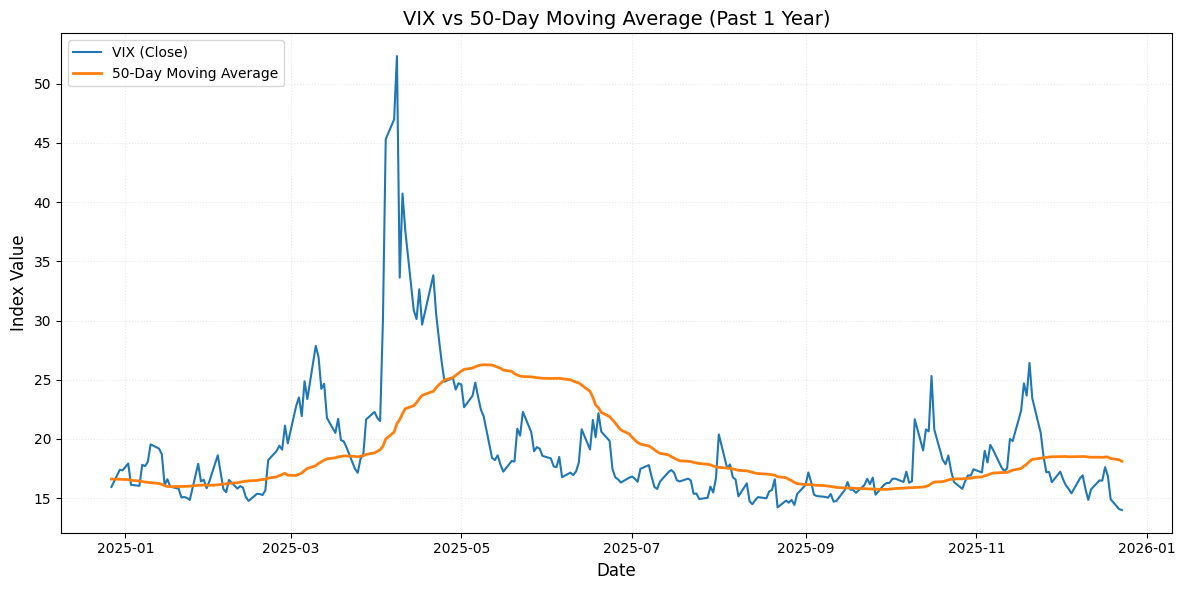

In [ ]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Define timeframe
  # set today as end date
  # set 1 year PLUS a buffer of 100 days (for 50-day moving average) as start date
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365 + 100)

# Fetch data from FRED
  # 'VIXCLS' is the ticker for CBOE Volatility Index in FRED
  # skips weekends and holidays
try:
    df = web.DataReader('VIXCLS', 'fred', start_date, end_date)
    df = df.dropna()

    # Calculate the 50-Day moving average
    df['50MA'] = df['VIXCLS'].rolling(window=50).mean()

    # Filter data to display only the last 365 days
      # drop buffer in plot
    plot_data = df.loc[df.index > (end_date - datetime.timedelta(days=365))]

    # Generate plot
    plt.figure(figsize=(12, 6))
    plt.plot(plot_data.index, plot_data['VIXCLS'], label='VIX (Close)', color='#1f77b4', linewidth=1.5)
    plt.plot(plot_data.index, plot_data['50MA'], label='50-Day Moving Average', color='#ff7f0e', linewidth=2)

    plt.title('VIX vs 50-Day Moving Average (Past 1 Year)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Index Value', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.3)
    plt.tight_layout()

    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    print("Note: Ensure FRED API is reachable.")